In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

import random

import pandas as pd

import glob
import os


import pickle


import Utils
import importlib
importlib.reload(Utils)
from Utils import DataGenerator,NNManager,TimingCallback,Predictor
from timeit import default_timer as timer

# PredictorAG_RNR

In [2]:
p = Predictor('Wrong_NNManager')

No existe un gestor llamado:  Wrong_NNManager 
No se ha creado un predictor


In [7]:
p = Predictor('Fully_Trained_NNManager')

NNManager:  Fully_Trained_NNManager
Tenemos huellas de  5900  individuos
Tenemos  70  redes entrenadas con sets de  250  huellas cada una
Cada huella se encuentra en  3  redes como mínimo
Predictor Iniciado sobre el Gestor


# Cargamos el dataset

In [8]:
# Cargamos el Dataset total

ruta  = 'dataset_590/'

x_real = np.load(ruta + 'img_real.npz')['data']
y_real = np.load(ruta + 'label_real.npy')
x_easy = np.load(ruta + 'img_easy.npz')['data']
y_easy = np.load(ruta + 'label_easy.npy')
x_medium = np.load(ruta + 'img_medium.npz')['data']
y_medium = np.load(ruta + 'label_medium.npy')
x_hard = np.load(ruta + 'img_hard.npz')['data']
y_hard = np.load(ruta + 'label_hard.npy')

print('REAL ',x_real.shape, y_real.shape)
print('Easy ',x_easy.shape, y_easy.shape)
print('Medium ',x_medium.shape, y_medium.shape)
print('Hard ',x_hard.shape, y_hard.shape)

REAL  (5900, 90, 90) (5900, 4)
Easy  (17632, 90, 90) (17632, 4)
Medium  (16776, 90, 90) (16776, 4)
Hard  (14025, 90, 90) (14025, 4)


Cargando modelo entrenado con el dataset:  30
Cargando modelo entrenado con el dataset:  53
Cargando modelo entrenado con el dataset:  56

La predicción para el usuario  [100   0   0   1]  es: [array([[0.993129]], dtype=float32), array([[0.99264354]], dtype=float32), array([[0.98214906]], dtype=float32)]
Tiempo de la predicción:  8.174298700000008


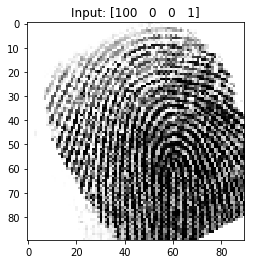

In [9]:
#Tomamos aleatoriamente una huella para probarla
random_idx = 0

#Obtenemos su imagen y su correspondiente etiqueta
random_img = x_real[random_idx]
random_label = y_real[random_idx]


#Para la imagen que hemos obtenido vamos a aplicar un desenfoque
# para simular la lectura imperfecta desde un lector.
random_img_aug = Utils.dataAugmentationImg(random_img)
starttime = timer()
prediction = p.predict(str(random_label),random_img_aug)
tiempo = timer() - starttime
print('\nLa predicción para el usuario ', random_label, ' es:', prediction)

print('Tiempo de la predicción: ',tiempo)

plt.figure(figsize=(8, 4))
plt.subplot(1, 1, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img_aug.squeeze(), cmap='gray')


Modelo entrenado con el dataset:  17 ya cargado
Modelo entrenado con el dataset:  28 ya cargado
Modelo entrenado con el dataset:  65 ya cargado
Modelo entrenado con el dataset:  72 ya cargado

La predicción para el usuario  [100   0   0   1]  es: [array([[0.11463418]], dtype=float32), array([[0.18310541]], dtype=float32), array([[0.20247425]], dtype=float32), array([[0.02899886]], dtype=float32)]
Tiempo de la predicción:  29.74203199999465


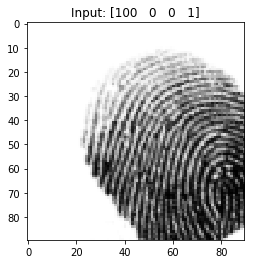

In [45]:
#Tomamos aleatoriamente una huella diferente para hacer la prueba negativa
random_idx_wrong = 1

#Obtenemos su imagen
random_img_wrong = x_real[random_idx_wrong]

#Para la imagen que hemos obtenido vamos a aplicar un desenfoque
# para simular la lectura imperfecta desde un lector.
random_img_aug_wrong = Utils.dataAugmentationImg(random_img_wrong)
starttime = timer()
prediction = p.predict(str(random_label),random_img_aug_wrong)
tiempo = timer() - starttime
print('\nLa predicción para el usuario ', random_label, ' es:', prediction)

print('Tiempo de la predicción: ',tiempo)

plt.figure(figsize=(8, 4))
plt.subplot(1, 1, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img_aug_wrong.squeeze(), cmap='gray')
